In [50]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil,pdutil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 30, "display.max_columns", None)

In [51]:
#importlib.reload(d_w21)

select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))
advance = pd.read_pickle('advance.df')

In [52]:
select.columns

Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercutting_1992_2017', 'w21_mean_undercutting_1992_1997',
       'w21_mean_und

In [53]:
advance

,w21t_key,year,velocity_source,aflux,sflux
0,F Graae,2011,ItsliveMerger,1317.844851,3.144046e+08
0,F Graae,2011,W21Merger,1183.912681,3.100157e+08
1,F Graae,2012,ItsliveMerger,1224.681881,2.809957e+08
1,F Graae,2012,W21Merger,1001.102951,3.809204e+08
2,F Graae,2013,ItsliveMerger,1156.493710,2.648307e+08
...,...,...,...,...,...
6,Ussing Braeer,2017,ItsliveMerger,742.509308,1.962539e+08
6,Ussing Braeer,2017,W21Merger,880.650263,2.634210e+08
7,Ussing Braeer,2018,ItsliveMerger,787.610140,2.313235e+08
7,Ussing Braeer,2018,W21Merger,880.650263,2.634210e+08


In [6]:
select = select[select.w21t_key == 'Store']
select

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,include,bkm15_key,bkm15_id,bkm15_new_greenl_name,bkm15_old_greenl_name,bkm15_foreign_name,bkm15_official_name,bkm15_alt,bkm15_allnames,lat,lon,loc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,ns642_points,up_key,up_fid,up_id,up_loc,w21t_key,w21t_Glacier,grid_info,fjord_classes,terminus,ns642_years,ns642_termini,retreat_rate
14,Store Gl.,Sermeq Kujalleq,CW,CR,-0.06,11.89,4.42,0.03,NaN,NaN,9.85,NaN,302.0,216.0,High,-0.28,-1.72,1.27,0.16,4.97,-0.06,-0.35,0.26,0.03,CW1,3.86,2.52,4.2,4.23,6.11,4.36,5.99,7.2,1.68,1.15,0.66,1.27,1.29,24.39,STORE_GLETSCHER,9.7,-0.3,9.8,11,Store Data.nc,"(Store Gl., STORE_GLETSCHER)","(Store Gl., Sermeq Kujalleq)",1.0,GGN0279,GGN0279,Sermeq Kujalleq,Sermeq Kujatdleq,Store Gletsjer,Sermeq Kujalleq,NaN,"(Sermeq Kujalleq, Sermeq Kujalleq, Sermeq Kuja...",70.4054,-50.5364,POINT (-206726.2817989104 -2132731.76283771),POLYGON ((-222237.4080796503 -2127259.36721851...,28.0,W70.55N,W70.55N,"POLYGON ((-223150 -2151150, -168050 -2151150, ...",Store Gletsjer,9.0,Sermeq Kujalleq,Sermeq Kujalleq,Store Gletsjer,Store Gletsjer,/Users/eafischer2/data_sets/velocities_data/ca...,Store Gletsjer,(POINT (-209281.5987104931 -2135263.678403165)...,"(Sermeq Kujalleq, Sermeq Kujalleq, Store Glets...",9.0,9,(POINT (-210317.0961012484 -2132583.073936897)...,12,12,None,POINT (-190507.0062973098 -2125849.566272085),Store,Store,<uafgi.gdalutil.FileInfo object at 0x11972c2d0>,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LINESTRING (-210317.0961012484 -2132583.073936...,"[2000, 2005, 2006, 2007, 2008, 2012, 2014, 201...",[LINESTRING (-210317.0961012484 -2132583.07393...,10.092501


In [12]:
select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))
#select = select[select.w21t_key == 'Store']


advance = pd.read_pickle('advance.df')
sigma_rows = []

dict(advance.groupby('w21t_key'))

TypeError: attribute of type 'str' is not callable

In [54]:
dfs = list()
for _,row in select.iterrows():
    adv = advance[advance['w21t_key'] == row['w21t_key']]
    adv['aflux'] = adv['aflux'] * .001
    adv['sflux'] = adv['sflux'] * .001
    aflux_w21 = adv[adv.velocity_source == 'W21Merger'].rename(columns={'aflux':'aflux_w21'})
    aflux_its = adv[adv.velocity_source == 'ItsliveMerger'].rename(columns={'aflux':'aflux_its'})

    sflux_w21 = adv[adv.velocity_source == 'W21Merger'].rename(columns={'sflux':'sflux_w21'})
    sflux_its = adv[adv.velocity_source == 'ItsliveMerger'].rename(columns={'sflux':'sflux_its'})


    
    data_fname = row['w21_data_fname']
    df = d_w21.glacier_rate_df(data_fname)
    df = df.reset_index()
    df = pdutil.merge_nodups(df, aflux_w21, left_on='time', right_on='year', how='left').drop('year',axis=1)
    df = pdutil.merge_nodups(df, aflux_its, left_on='time', right_on='year', how='left').drop('year',axis=1)

    df = pdutil.merge_nodups(df, sflux_w21, left_on='time', right_on='year', how='left').drop('year',axis=1)
    df = pdutil.merge_nodups(df, sflux_its, left_on='time', right_on='year', how='left').drop('year',axis=1)

    df['sflux1_w21'] = df['sflux_w21'] * df['ice_advection'] / df['aflux_w21']
    df['sflux1_its'] = df['sflux_its'] * df['ice_advection'] / df['aflux_its']

    df['sigma_max_w21'] = (df['sflux_w21'] * df['ice_advection']) / (df['aflux_w21'] * -df['calving'])
    df['sigma_max_its'] = (df['sflux_its'] * df['ice_advection']) / (df['aflux_its'] * -df['calving'])

#    df = df.drop(columns=['sflux_w21', 'sflux_its', 'sigma_max_w21', 'sigma_max_its', 'sflux1_w21', 'sflux1_its', 'sflux_x', 'sflux_y', 'aflux_x', 'aflux_y'])
    
    df = df.set_index('time')
    df = df.dropna()
    
    dfs.append(df)

sigmas0 = pd.concat(dfs)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:440: IntegrationWarning: The occurrence of roundoff error

ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:440: IntegrationWarning: The occurrence of roundoff error

ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:440: IntegrationWarning: The occurrence of roundoff error

ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:440: IntegrationWarning: The occurrence of roundoff error

ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)


In [24]:
sigmas0.to_csv('sigmas.csv')
sigmas0.to_pickle('sigmas.df')

In [36]:
print(sigmas0.index)
sigmas0.columns

Float64Index([2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2011.0, 2012.0,
              2013.0, 2014.0,
              ...
              2015.0, 2016.0, 2017.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0],
             dtype='float64', name='time', length=121)


Index(['ice_advection', 'ice_front_undercutting', 'ice_front_retreat',
       'thinning_induced_retreat', 'calving', 'w21t_key', 'velocity_source',
       'aflux_w21', 'sflux', 'aflux_its', 'aflux', 'sflux_w21', 'sflux_its',
       'sflux1_w21', 'sflux1_its', 'sigma_max_w21', 'sigma_max_its'],
      dtype='object')

In [38]:
sigmas0.reset_index()

,time,ice_advection,ice_front_undercutting,ice_front_retreat,thinning_induced_retreat,calving,w21t_key,velocity_source,aflux_w21,sflux,aflux_its,aflux,sflux_w21,sflux_its,sflux1_w21,sflux1_its,sigma_max_w21,sigma_max_its
0,2011.0,1.202709,-0.261631,-0.121865,-1.426411e-02,-1.048679,F Graae,W21Merger,1.183913,310015.745624,1.317845,1.183913,310015.745624,314404.594596,314937.712794,286936.098717,300318.495365,273616.699214
1,2012.0,1.198620,-0.244258,-0.028997,-2.318487e-02,-0.960174,F Graae,W21Merger,1.001103,380920.366482,1.224682,1.001103,380920.366482,280995.743011,456075.589750,275015.913449,474992.728814,286423.045066
2,2013.0,1.108073,-0.253840,0.067500,-3.377885e-02,-0.752953,F Graae,W21Merger,0.701135,85849.442311,1.156494,0.701135,85849.442311,264830.724803,135676.285866,253742.564764,180192.140455,336996.370275
3,2014.0,1.209284,-0.258015,-0.075156,-2.372200e-02,-1.002703,F Graae,W21Merger,1.197912,463334.886130,1.324472,1.197912,463334.886130,369283.472872,467733.338869,337167.214192,466472.345558,336258.222750
4,2015.0,1.160736,-0.281152,0.042918,-6.913185e-03,-0.829753,F Graae,W21Merger,1.370384,492230.042751,1.387529,1.370384,492230.042751,415356.864754,416926.484737,347466.485566,502470.851412,418759.151147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2013.0,2.084563,-0.462860,0.328629,-7.869327e-02,-1.214380,Upernavik Isstrom C,W21Merger,0.052828,14605.957603,0.043183,0.052828,14605.957603,13120.836292,576345.274851,633382.736385,474600.444742,521568.826010
117,2014.0,2.083193,-0.429575,-0.456996,-3.494517e-01,-1.761162,Upernavik Isstrom C,W21Merger,0.087620,22692.686478,0.063009,0.087620,22692.686478,16089.070214,539525.900810,531930.922596,306346.521445,302034.040519
118,2015.0,2.128856,-0.426739,-1.390665,-1.098740e-01,-2.982909,Upernavik Isstrom C,W21Merger,0.294873,113200.594744,0.265054,0.294873,113200.594744,68150.766304,817259.892389,547372.529589,273980.825030,183502.920738
119,2016.0,2.258124,-0.390229,-0.153149,2.220446e-16,-2.021044,Upernavik Isstrom C,W21Merger,0.232503,62179.578916,0.301045,0.232503,62179.578916,52645.232083,603902.593108,394889.491266,298807.282455,195388.887383


<IPython.core.display.Javascript object>


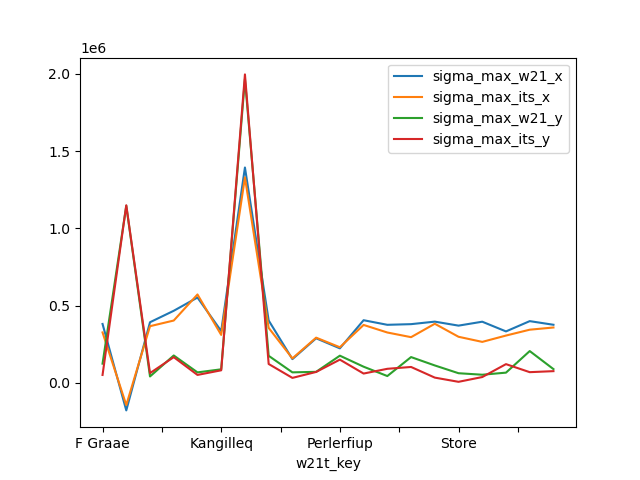

,sigma_max_w21_x,sigma_max_its_x,sigma_max_w21_y,sigma_max_its_y
w21t_key,,,,
F Graae,3.816251e+05,3.268191e+05,1.248781e+05,5.182755e+04
Farquhar,-1.774476e+05,-1.428706e+05,1.145775e+06,1.149193e+06
Helheim,3.928224e+05,3.672075e+05,4.212592e+04,6.370458e+04
Kangerlussuaq,4.668313e+05,4.038422e+05,1.777901e+05,1.668944e+05
Kangiata Nunaata,5.525167e+05,5.723507e+05,6.842718e+04,5.199404e+04
Kangilleq,3.355570e+05,3.107669e+05,8.833241e+04,8.191773e+04
Koge Bugt C,1.393462e+06,1.329410e+06,1.965678e+06,1.995696e+06
Kong Oscar,4.040523e+05,3.562097e+05,1.756211e+05,1.227455e+05
Morell,1.542014e+05,1.589088e+05,6.861965e+04,3.279321e+04


In [55]:
sg=sigmas0.groupby(['w21t_key'])
cols = ('sigma_max_w21', 'sigma_max_its')
dfm = sg.mean()[[*cols]]
dfs = sg.std()[[*cols]]
df = dfm.merge(dfs, how='outer', left_index=True, right_index=True)
df.plot()
df

<IPython.core.display.Javascript object>


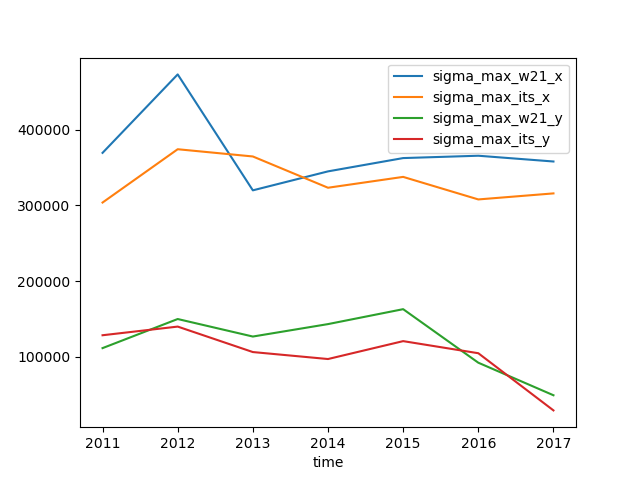

In [49]:
#sg=sigmas0.groupby(['w21t_key'])
sg=sigmas0[~sigmas0['w21t_key'].isin(('Farquhar', 'Koge Bugt C'))]
sg=sg.groupby(['time'])
cols = ('sigma_max_w21', 'sigma_max_its')
dfm = sg.mean()[[*cols]]
dfs = sg.std()[[*cols]]
df = dfm.merge(dfs, how='outer', left_index=True, right_index=True)
df.plot()

In [87]:
sigmas = sigmas0.set_index('w21t_key')
sigmas = sigmas.drop('Farquhar').drop('Koge Bugt C').dropna()
#, 'NaN', 'Koge Bugt C'])


In [88]:
sigmas

,sigma_max_w21,sigma_max_w21_std,sigma_max_its,sigma_max_its_std
w21t_key,,,,
F Graae,381625.122709,124878.051375,326819.096439,51827.548068
Perlerfiup,223875.202363,176459.833692,230958.784483,150929.220608
Sermeq Avannarleq,380378.487178,167424.025945,296203.143870,103458.208873
Kangilleq,335556.964876,88332.405183,310766.900400,81917.728194
Ussing Braeer,376359.276307,89609.142455,358744.592966,76440.803066
Kong Oscar,404052.270845,175621.053677,356209.713477,122745.523502
Morell,154201.416098,68619.654275,155056.639435,30811.508363
Nordenskiold,288958.591944,71973.650219,292999.471426,71293.416362
Rimfaxe,405802.362034,105201.149123,375275.821627,60866.469247


<IPython.core.display.Javascript object>


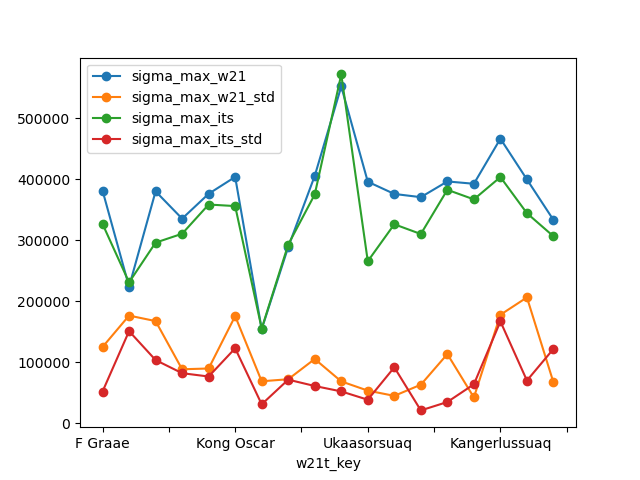

In [89]:
sigmas.plot(marker='o')